In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, levene

In [3]:
data = pd.read_csv('C:/Users/tadeu/Documents/Projetos/Cleverly/data/Amazon_Reviews_Clothing_Shoes_and_Jewelry_5_sample.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


In [4]:
#Data Overview

data.dtypes

asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

In [5]:
#need to retrieve the values of helpfulness separetly
yes =[]
total=[]

for a in range(0,len(data)):
    over = data.helpful[a].strip('[]')
    yes.append(over.split(',')[0])
    total.append(over.split(',')[1])

data.insert(1, 'yes', pd.to_numeric(yes))
data.insert(2, 'total', pd.to_numeric(total))
data.drop('helpful',1)



,asin,yes,total,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00008ID1O,3,4,5,I was waiting to have a bad odor from these pa...,"09 10, 2012",ARZLW6MFV58E9,"Denise Elkin-andrews ""dee""",Excellent,1347235200
1,B00008ID1O,1,1,4,"I have worn these for years, but was concerned...","01 5, 2014",A454H175JAT32,Emily,"some odor, but not really a concern",1388880000
2,B00008ID1O,7,7,1,Horrible smell gave me an asthmatic attack whe...,"07 19, 2013",A1X5NM3HXQANFL,Jasminenirvana,Terrible Chemical Smell,1374192000
3,B00008ID1O,0,2,3,These are really verging on &#34;granny pantie...,"10 15, 2013",AVKF05BAX2Z3I,K. H. Noland,If these are bikini then I hate to see briefs!,1381795200
4,B00008ID1O,3,3,5,"Have been wearing these for years, but was hes...","03 21, 2013",AQJWVL7YBSMOL,Mail Debaser,Fine for Me,1363824000
5,B00008ID1O,2,2,4,The Jockey Elance Bikini is closer to a low-wa...,"02 25, 2009",A3DF2RIXV8DRJN,M. Hofelich,Cool and Comfy,1235520000
6,B00008ID1O,2,2,5,Fit. Comfortable. Prime. Who could ask for mor...,"08 25, 2013",A1W64ZEL2TQBPD,"Naney ""Naney""",Comfortable,1377388800
7,B00008ID1O,0,0,5,"100% cotton, fit well, don't look to dowdy, I ...","06 25, 2013",A27J2K9RU1JCFE,"onlineonlyJAG ""OnlineonlyJAG""",Excellent,1372118400
8,B00008ID1O,0,0,5,These fit better than any panties I've ever wo...,"05 6, 2013",A1RF0CB0FH2LD8,Sivan,Quality,1367798400
9,B00008ID1O,7,7,1,I have been a jockey fan for many years but th...,"05 24, 2013",APF6PI31359U5,Snow,Quality has gone Downhill,1369353600


### Is there a correlation between the rating of the product and the helpfulness of the review?

LeveneResult(statistic=7.462852580981266, pvalue=0.006302376235862596)
Pearsons correlation: -0.011


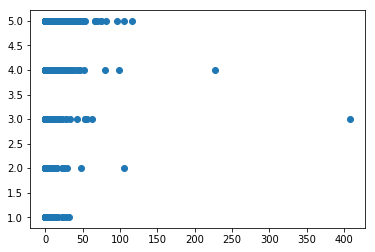

In [6]:
plt.scatter(data['yes'], data['overall'])

print(levene(data['yes'], data['total']))

corr, _ = pearsonr(data['yes'], data['overall'])
print('Pearsons correlation: %.3f' % corr)

#There is no correlation between he rating of the product and the helpfulness of the review

### Lets look now understand our reviewers

In [16]:
reviewers = data['yes'].groupby(data['reviewerID']).count()
print(data.groupby('reviewerID')['yes'].sum().sort_values(ascending=False))
      
#print("Top 20 Reviewers \n"))

sorted_reviewers = reviewers.sort_values(ascending=False)
print("Top 20 Reviewers \n")
print(sorted_reviewers[:20], end='\n\n')
print('Most Reviewed Reviewer, A2GA55P7WGHJCP - has {} helpful reviews.'.format(reviewers.max()))

reviewerID
A1IU7S4HCK1XK0           408
A30NHVVC62LJMK           267
A2R6RA8FRBS608           152
AFHYEO3Y1IIDD            107
A2NZIF62RSX9VW           105
A1M54RKARXK8DU            98
A2I4JU06JM47LR            96
A3PAPZE14TIHP8            85
A1RXXWA0HPGSU             81
A1JXY9I578VQ3O            75
A18X6ZT4AEYVKB            75
AMYI4FBXF68X4             69
AEVTLUYR5JC8H             68
ACL6H8Q17XQPN             66
A2N3UF4KPCZFXB            66
A24JGUKZEYVQJW            62
A37ZCYY3CGEJFX            56
A325Q8LI2V97XV            53
A3SVNQ9HDLDPVH            53
A335713MZIGYB1            53
AXQW6IS0Z62BR             52
A3R1WL67CFHL0Z            52
A2KB402X85NQML            51
A10QZ2QP9EMW71            50
A3FBOUQQWKO2T2            49
A1DU4P2QWGA2VF            49
A3MJRWQQECRA7             48
A1IGCUY11IG8I2            48
A2CKWT89SZKCA3            47
A1WOMXOEX90ARI            47
                        ... 
A39YQPI318NNYY             0
A39YI13KZY0TTH             0
A39X53LTAIP1R4             0
A39

### Have reviews been getting more or less helpful over time?

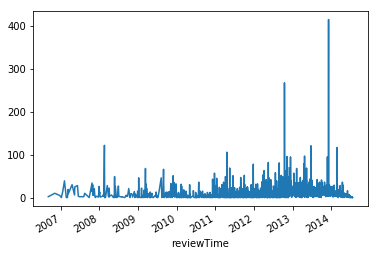

In [20]:
data["reviewTime"] = pd.to_datetime(data["reviewTime"])

data['yes'].groupby(data['reviewTime']).sum().plot()


#We can say Yes! The Reviews are getting more helpful!

# Modelling

In [23]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [24]:
#Retrieve features by removing not important words

In [25]:
reviews = data['reviewText']

stops = stopwords.words('english')

def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return tokens


def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

reviews = reviews.apply(lambda x: tokenize(x))

#### Creating my label. Assume a god review just more than 0 to not have a big  variance in dataset numbers

In [26]:
data['label'] = [1 if x > 0 else 0 for x in data.yes]

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [28]:

x_train, x_test, y_train, y_test = train_test_split(data.reviewText, data.label, random_state=0)

In [29]:
print(len(x_train))
print(len(x_test))

10724
3575


In [30]:
# Create feature as counting how many times a word appear

In [31]:
vectorizer = CountVectorizer().fit(x_train)
X_train = vectorizer.transform(x_train)


# Model evaluation

In [32]:
#Use cross validation to tnderstand homogenity of dataset

In [33]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

C:\Users\tadeu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean cross-validation accuracy: 0.696


In [34]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [35]:
# 72% of accuracy. Not so good. Lets try a simple and efficient ensemble algorithm. Random Tree

In [36]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.728


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
#Take very long time to calculate.

# More time to analyse the count vectorized. Better understand of features retrieve from language analysis.